In [5]:
from acyclic_orientation import *
from uccgGenerator import tree_insertion

In [33]:
def plot_inter(IF, sink, source, pos, finished):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plot_IF(IF, pos)
    plt.title(f'flip {(sink, source)}, current: {source}, finished: {finished}')
    plt.subplot(1, 2, 2)
    plt.axis('off')
    dg = nx.DiGraph()
    dg.add_edges_from([e for e in IF.edges if not IF.edges[e][in_current] or IF.edges[e][label]==common_edge])
    cycles = [set(c) for c in nx.simple_cycles(dg) if len(c) == 3]
    plt.title(f"{cycles}")
    plot_complement(IF, pos)


In [39]:
def process_chordal_manually(IF, F, pos):
    finished = []
    for _ in range(len(F)):
        source = [u for u in F if F.in_degree(u) == 0][0]
        sub = nx.DiGraph(current_graph(IF).subgraph(F.neighbors(source)))
        while len(sub):
            sink = [u for u in sub if sub.out_degree(u) == 0][0]
            if (sink, source) in current_graph(IF).edges:
                IF.edges[(sink, source)][in_current] = False
                IF.edges[(source, sink)][in_current] = True
                assert nx.is_directed_acyclic_graph(current_graph(IF))
                plot_inter(IF, sink, source, pos, finished)
            sub.remove_node(sink)
        finished.append(source)
        F.remove_node(source)

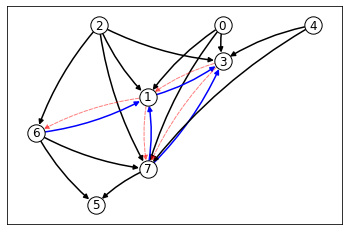

In [40]:
n, m = 8, 16
g = tree_insertion(n, m)
# g = nx.complete_graph(6)
I = gen_random_acyclic_orientation(g)
F = gen_random_acyclic_orientation(g)
IF = get_IF(I, F)
pos = graphviz_layout(F, prog='dot')
plot_IF(IF, pos)

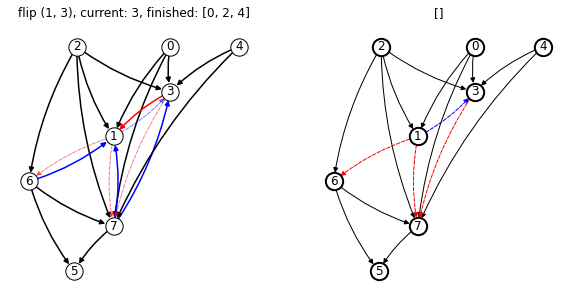

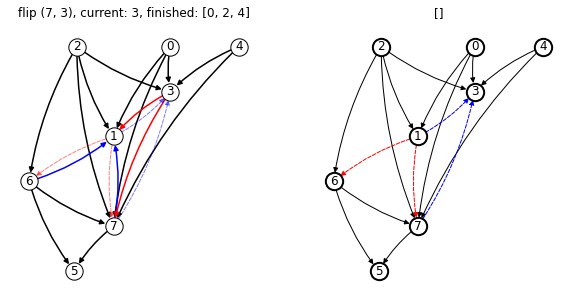

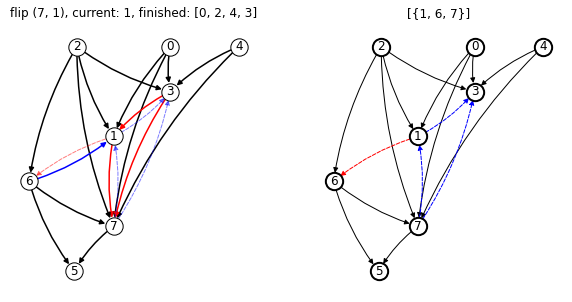

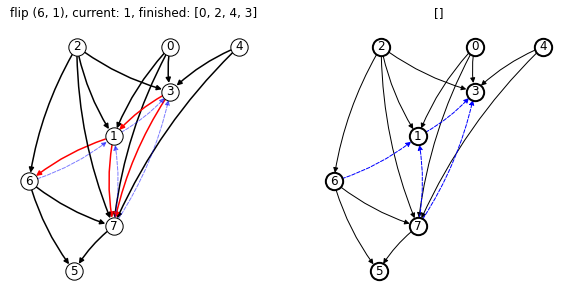

In [41]:
IF_copy = nx.DiGraph(IF)
process_chordal_manually(IF_copy, F,  pos)

In [32]:
succeed(IF_copy)

True